In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid', palette='deep')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Чтение и первичный анализ данных

In [2]:
# Прочитаем файл с информацией по красному вину. Выведем первые 5 записей 

redwine = pd.read_csv("winequality-red.csv", delimiter=";")
redwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# Посмотрим на наши фичи
redwine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Наблюдаем 11 фич + 1 колонку таргета, все значения цифровые, пропусков нет, что, впрочем, было нам известно из описания датасета

In [4]:
# Предпримем те же действия для файла с информацией по белому вину
whitewine = pd.read_csv("winequality-white.csv", delimiter=";")
redwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
whitewine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


Те же 11 фич + таргет, без пропусков.

Посмотрим какое мы имеем распределение по качеству внутри наших дата-фреймов

<Axes: title={'center': 'White wines'}, xlabel='quality', ylabel='count'>

<Figure size 640x480 with 0 Axes>

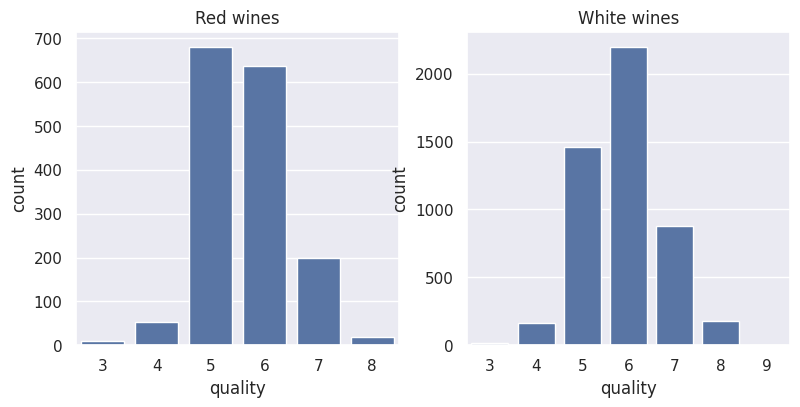

In [6]:
plt.figure()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
axes[0].set_title("Red wines")
axes[1].set_title("White wines")
fig.tight_layout()
sns.countplot(data=redwine, x="quality", ax=axes[0])
sns.countplot(data=whitewine, x="quality", ax=axes[1])

Обращаем внимание на то, что вин среднего качества (5, 6) сильно больше чем остальных. 
Данный факт следует учесть в дальшейшем при разбиении нашей выборки на обучающую и тестовую части.

Как насчет корреляции между фичами, не считая таргета?

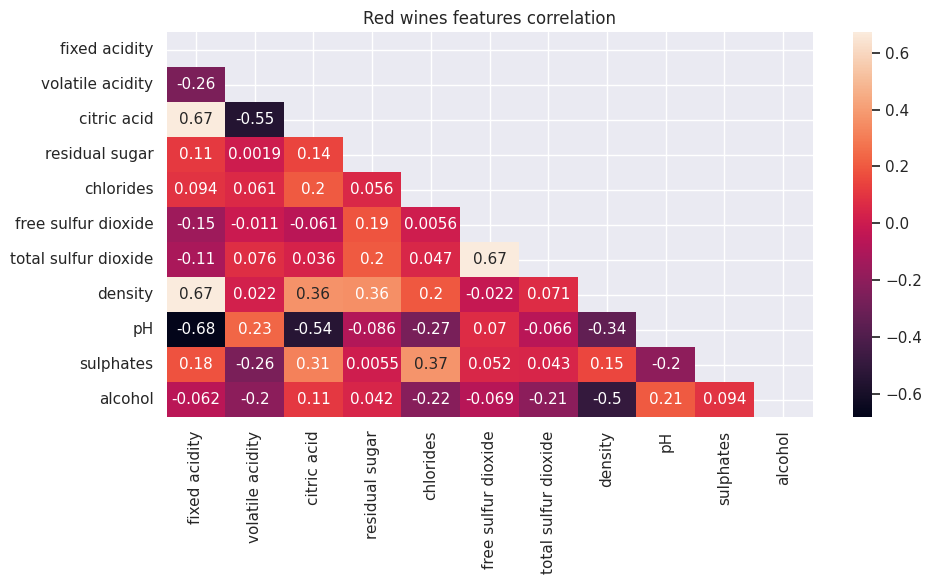

In [7]:
# Для красного

plt.figure(figsize=(10, 6))

corr_matrix = redwine.drop("quality", axis=1).corr()
mask = np.triu(corr_matrix)
sns.heatmap(corr_matrix, mask=mask, annot=True, annot_kws={"fontsize":11})

plt.ylabel('')
plt.xlabel('')
plt.title('Red wines features correlation')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Построим матрицу рассеяния

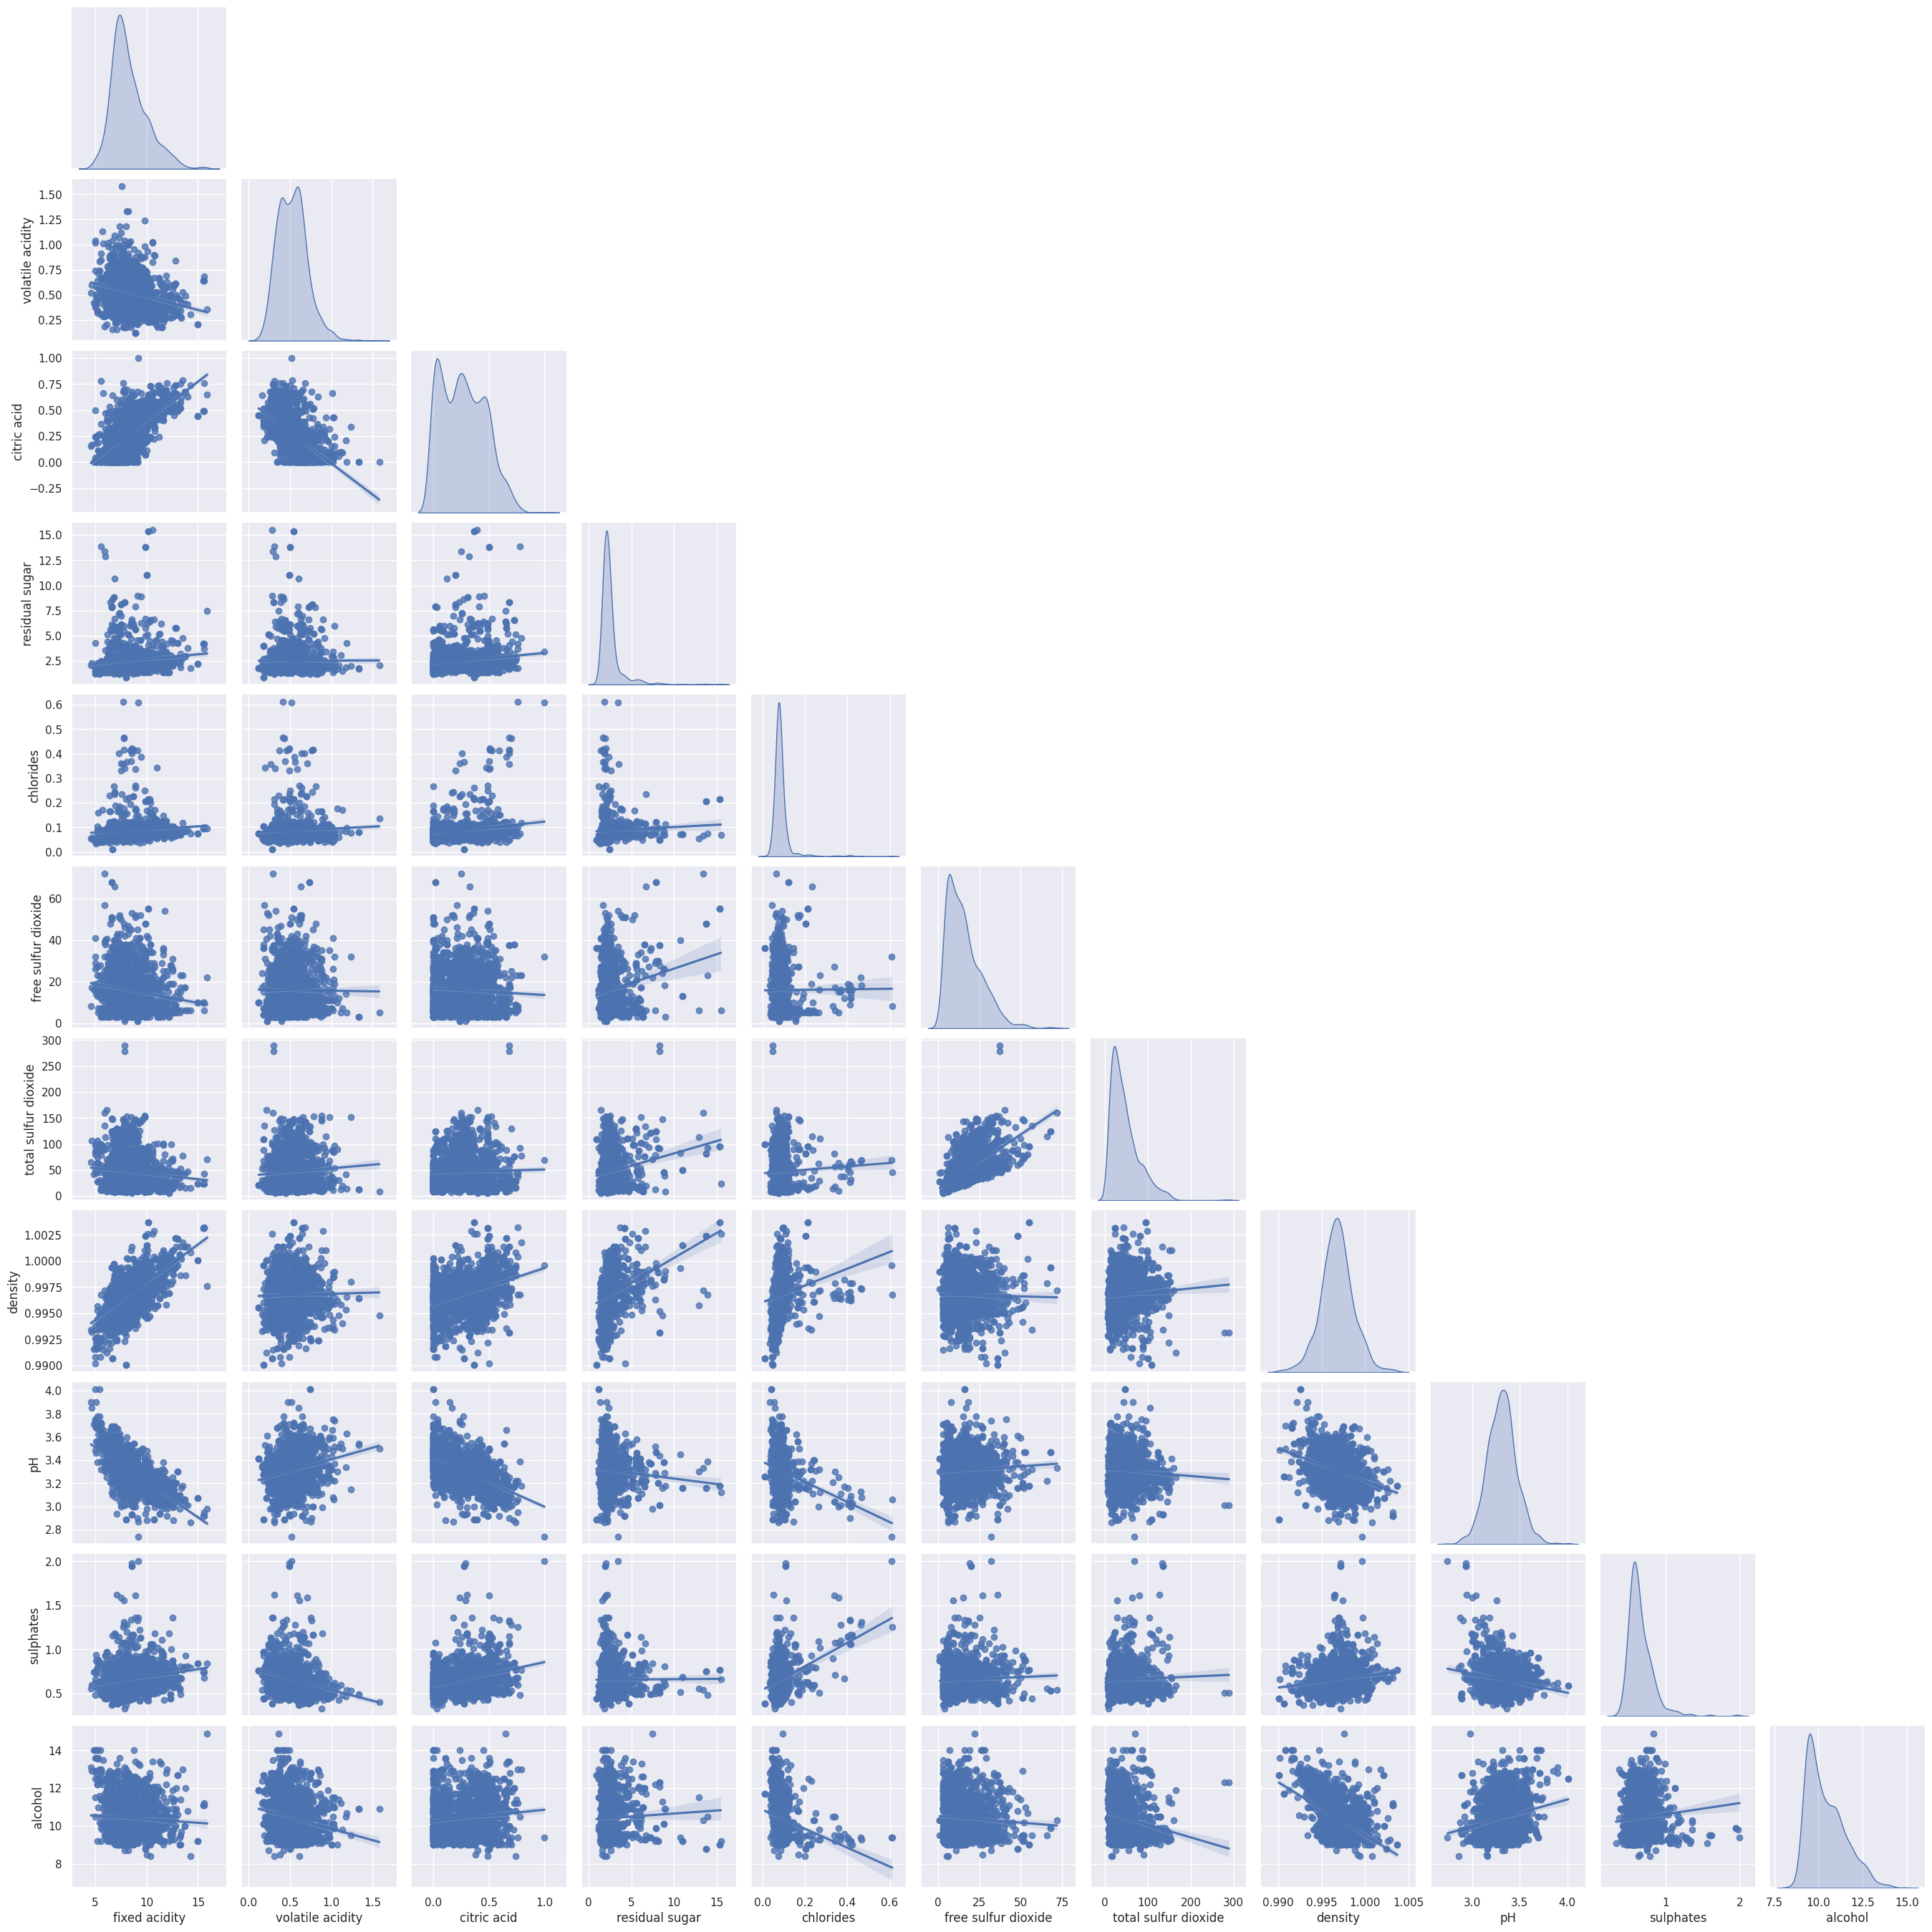

In [8]:
sns.pairplot(data=redwine.drop("quality", axis=1), corner=True, kind="reg", diag_kind="kde")

Посмотрим покрупнее на кислотные показатели

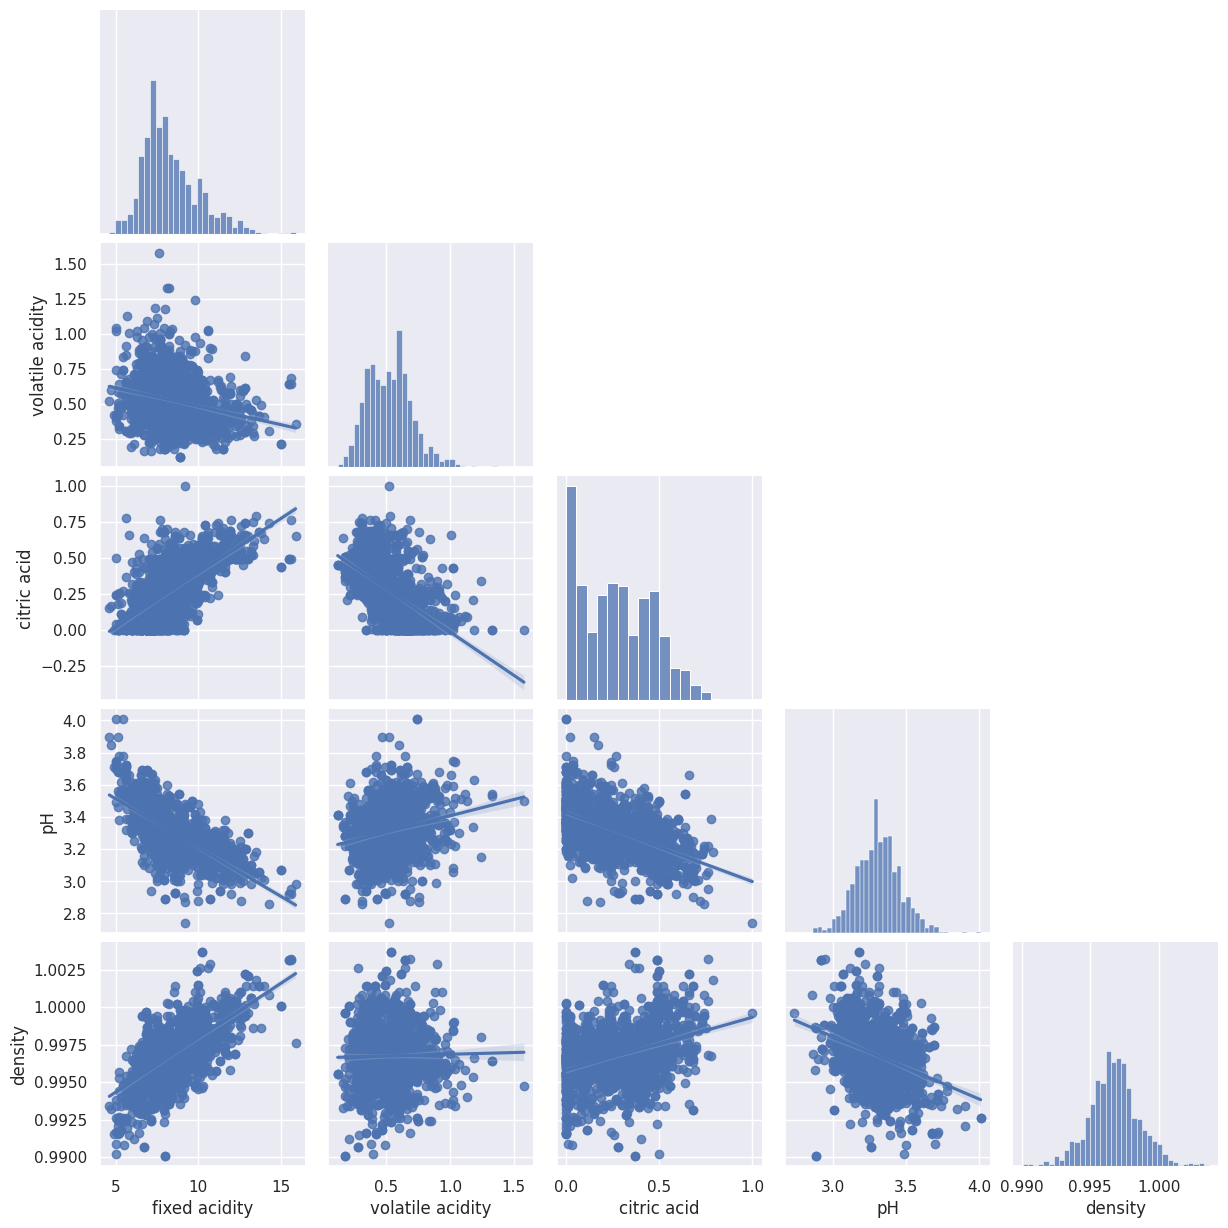

In [9]:
sns.pairplot(data=redwine[["fixed acidity", "volatile acidity", "citric acid", "pH", "density"]], 
             corner=True, kind="reg")

Наблюдаем определенную корреляцию между fixed acidity и citric acid, а также фичами total sulfur dioxide и free sulfur dioxide. Объединим их вместе, но сначала оценим соотношение порядков их значений

In [10]:
redwine[["fixed acidity", "volatile acidity", "citric acid", "total sulfur dioxide", "free sulfur dioxide"]].head(10)

,fixed acidity,volatile acidity,citric acid,total sulfur dioxide,free sulfur dioxide
0,7.4,0.70,0.00,34.0,11.0
1,7.8,0.88,0.00,67.0,25.0
2,7.8,0.76,0.04,54.0,15.0
3,11.2,0.28,0.56,60.0,17.0
4,7.4,0.70,0.00,34.0,11.0
5,7.4,0.66,0.00,40.0,13.0
6,7.9,0.60,0.06,59.0,15.0
7,7.3,0.65,0.00,21.0,15.0
8,7.8,0.58,0.02,18.0,9.0
9,7.5,0.50,0.36,102.0,17.0


Видим, что fixed acidity на порядок выше двух других показателей acidity. Разделим его на 10
Total sulfur dioxide в целом превышает free sulfur dioxide в три раза. Не будем их пока скейлить.

Введем две новые фичи - acid и sulfur, равные среднему квадратичному соответствующих показателей.
При этом, не забываем разделить fixed acidity на 10

In [11]:
def mean_squared(columns: pd.DataFrame) -> pd.Series:
    return np.sqrt(np.mean(np.square(columns), axis=1))

redwine["fixed acidity div 10"] = redwine["fixed acidity"] / 10

acid_columns = ["fixed acidity div 10", "volatile acidity", "citric acid"]
redwine["acid"] = mean_squared(redwine[acid_columns])

sulfur_columns = ["free sulfur dioxide", "total sulfur dioxide"]
redwine["sulfur"] = mean_squared(redwine[sulfur_columns])

In [12]:
# Сформируем список фич, с которыми будем дальше работать и 
# еще раз построим корреляционную матрицу и матрицу рассеяния
columns_for_analysis = ["acid", 
                        "residual sugar", 
                        "chlorides", 
                        "sulfur", 
                        "density", 
                        "pH", 
                        "sulphates", 
                        "alcohol", 
                        "quality"]

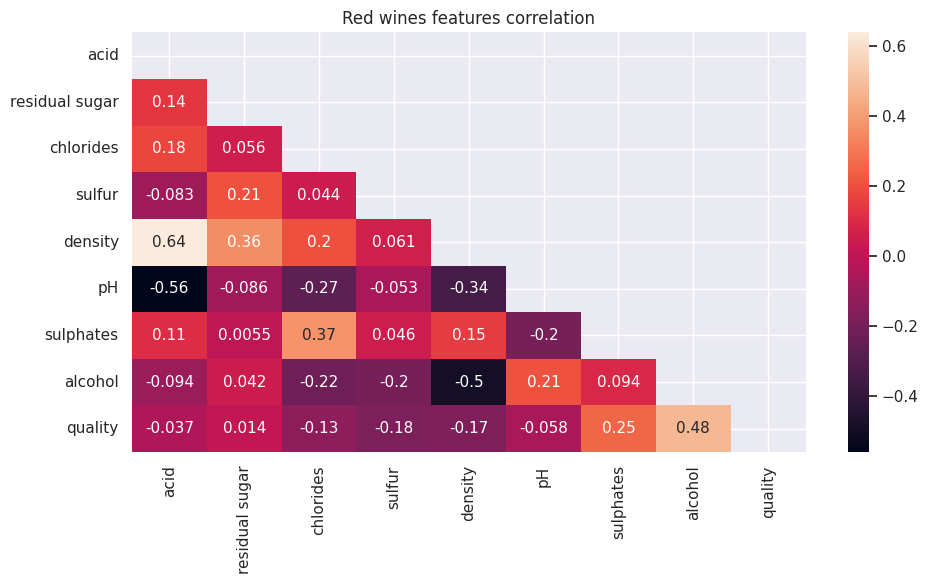

In [13]:
plt.figure(figsize=(10, 6))

corr_matrix = redwine[columns_for_analysis].corr()
mask = np.triu(corr_matrix)
sns.heatmap(corr_matrix, mask=mask, annot=True, annot_kws={"fontsize":11})

plt.ylabel('')
plt.xlabel('')
plt.title('Red wines features correlation')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

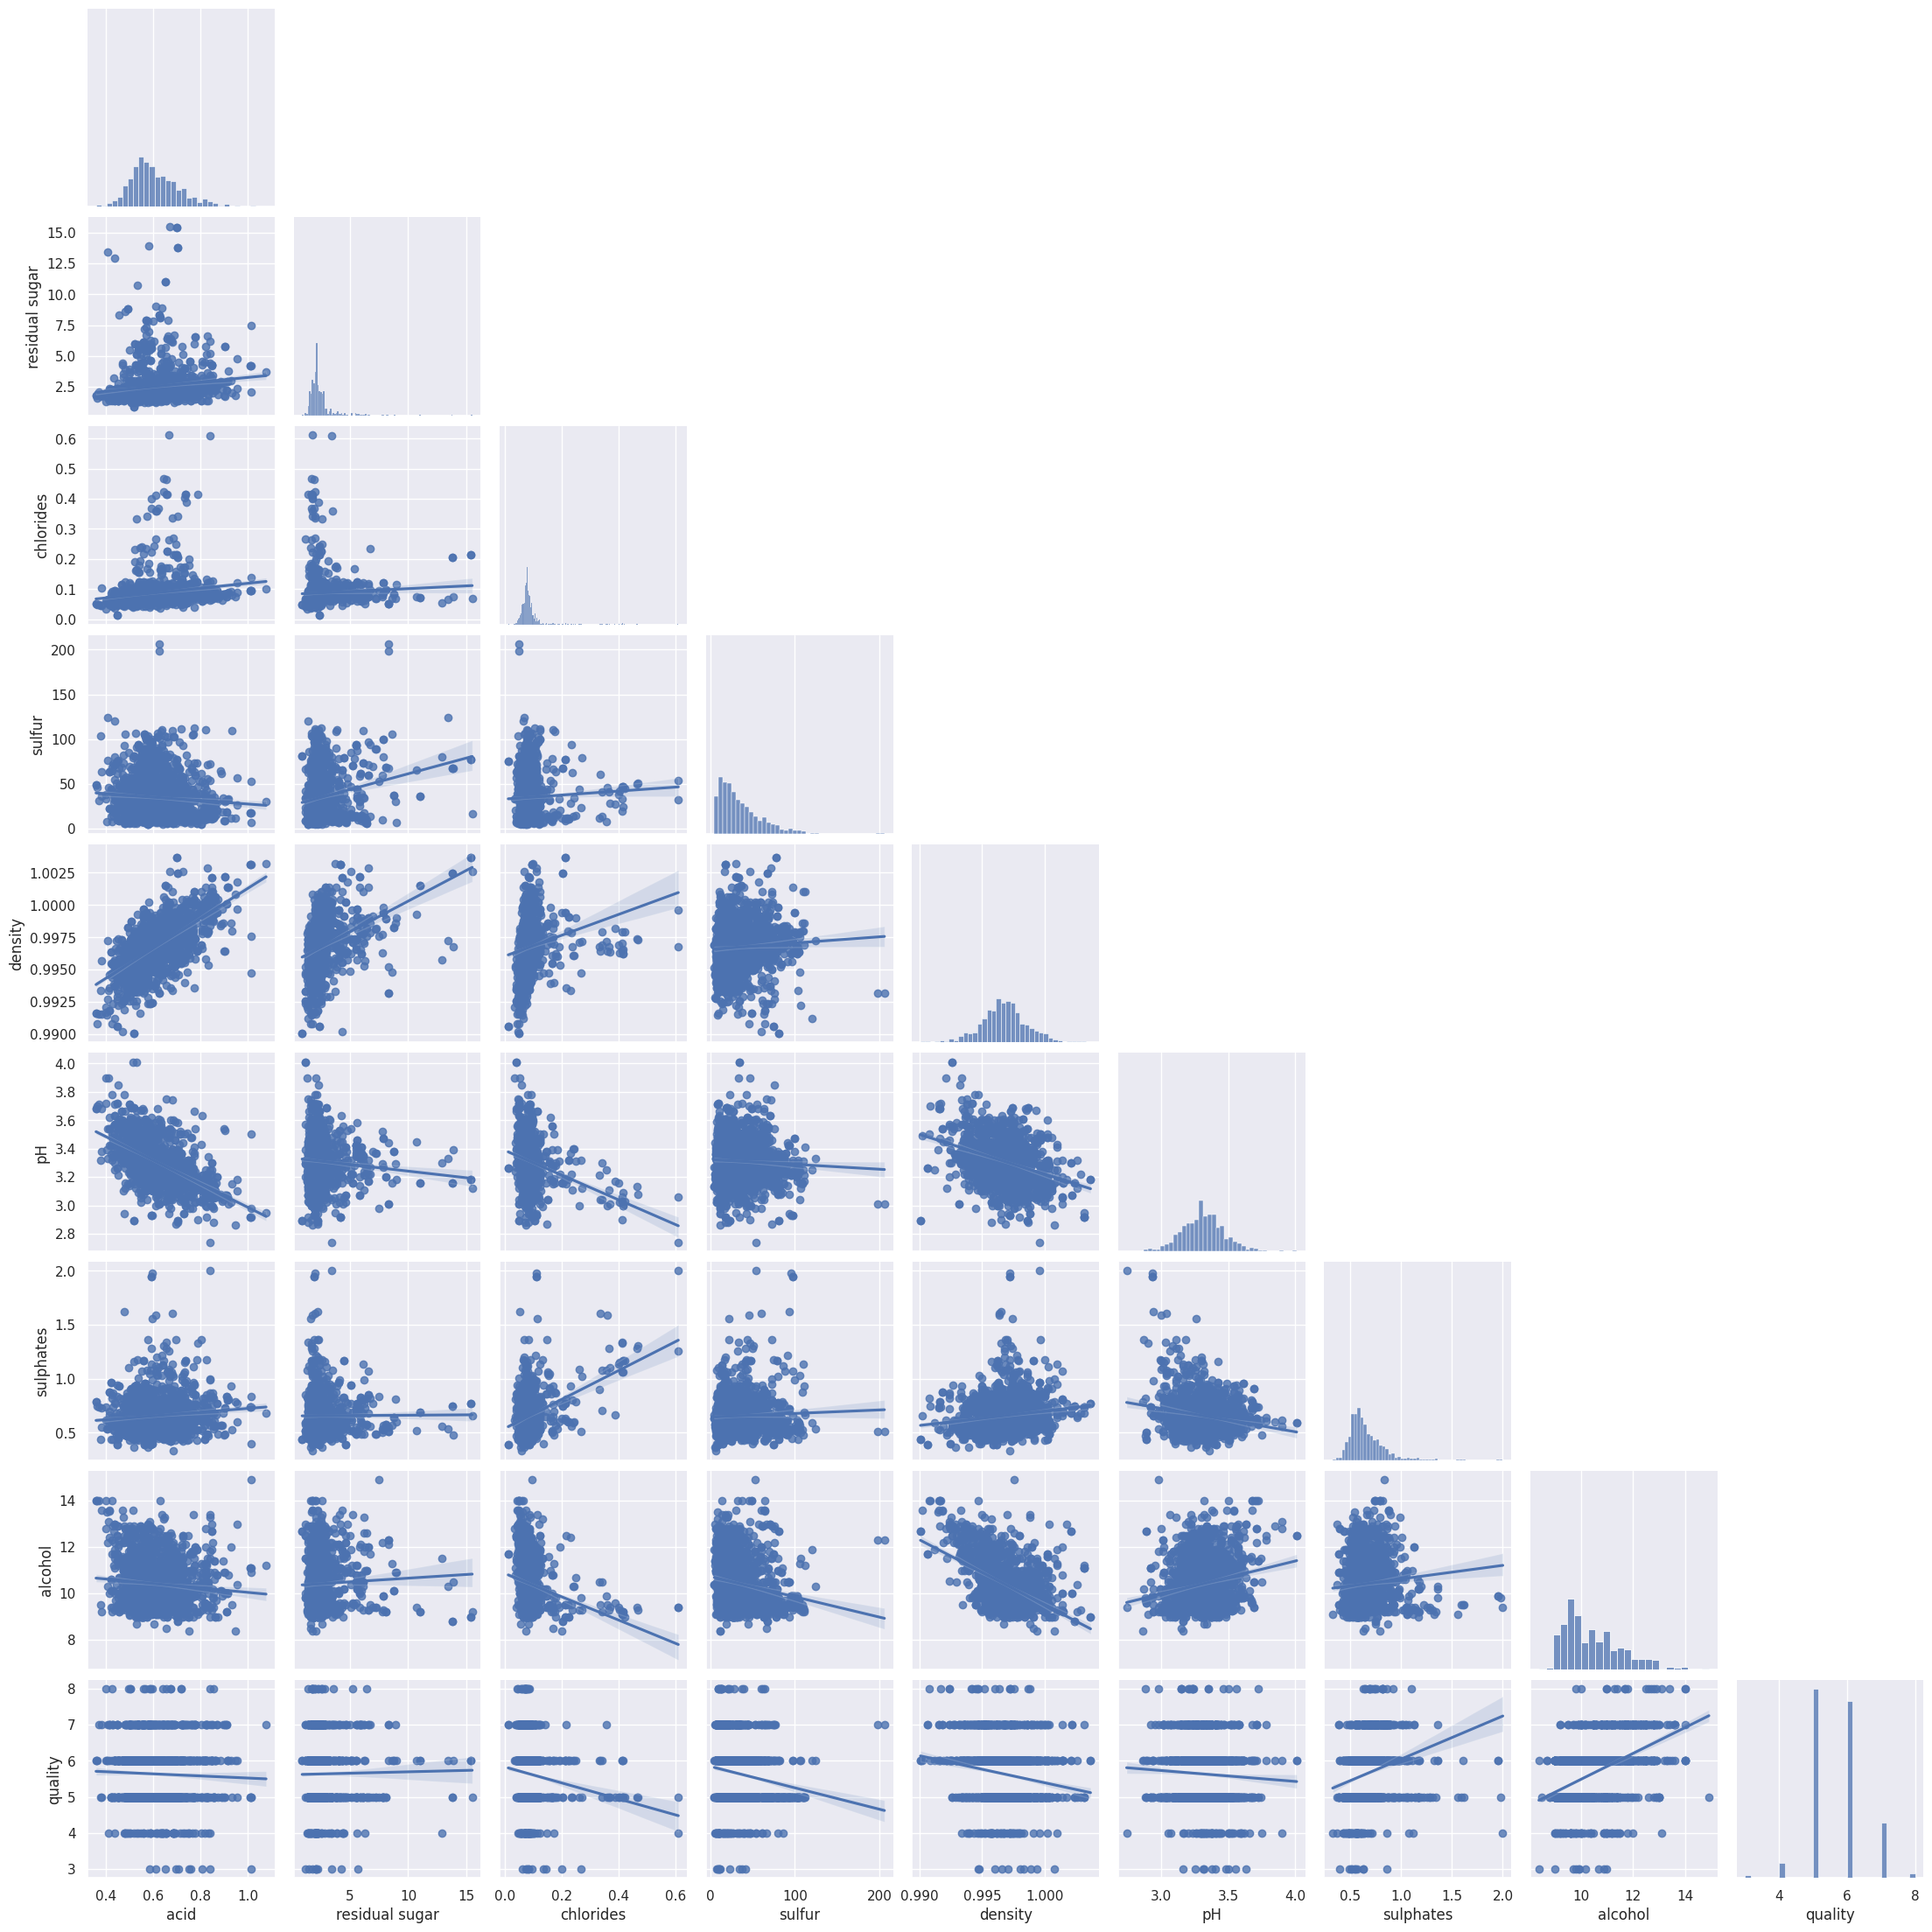

In [14]:
sns.pairplot(data=redwine[columns_for_analysis], corner=True, kind="reg")

Выглядит получше. Можем переходить к обучению модели.

# Линейная регрессия

## Формирование данных, разбиение на тренировочную и тестовую части, масштабирование

In [15]:
# Формируем матрицу фич и вектор ответов

X = redwine[columns_for_analysis[:-1]]
y = redwine["quality"]

In [16]:
# Разделим данные на тренировочную и тестовую части. 
# Вспомним, при этом, что датасет не равномерен по качеству (средних вин больше),
# поэтому применим параметр stratify 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [17]:
# Выполним масштабирование данных. Обучаем скалер на тренировочных данных. 
# После этого также преобразовываем тестовую часть

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Создание модели и кросс-валидация на наших данных

In [18]:
# Создаем объект линейной регрессии:
reg = LinearRegression()

In [19]:
# Выполняем кросс-валидацию, разбив наш датасет на 3 части
cv_scores = cross_val_score(reg, X_train, y_train, cv=3)
print(cv_scores)
print(f"Точность {cv_scores.mean():.3f} со стандартным отклонением {cv_scores.std():.2f}")

[0.37164585 0.25462357 0.27667757]
Точность 0.301 со стандартным отклонением 0.05


Увы, но не вполне понимаю, как интерпретировать эти цифры. Требуется еще раз объяснить

## Получение и оценка результата

In [20]:
# Тренируем модель на тренировочных данных
reg.fit(X_train, y_train)

# Рассчитываем оценку на тренировочной и тестовых частях датасета:
train_score = reg.score(X_train, y_train)
test_score = reg.score(X_test, y_test)

# Выводим оценки на экран
print(f"Train score: {train_score:.3f}")
print(f"Test score: {test_score:.3f}")


Train score: 0.330
Test score: 0.320


Видим, что оценки по тренировочной и тестовой частям, а также по трем фолдам кросс-валидации не особо отличаются. 
Что конкретно из этого следует и почему 0.3 - это ОК, еще раз переспрошу на лекции. 

Посмотрим метрики нашей модели - среднеквадратичные ошибки на тренировочной и тестовой частях. 
Это позволит нам оценить адекватность и степень натренированности модели.

In [21]:
# Реализуем функцию, которая будет вычислять и выводить MSE для наших моделей. 

def calc_MSE(model, X_train, X_test, y_train, y_test):
    y_train_predicted = model.predict(X_train)
    y_test_predicted = model.predict(X_test)
    
    mse_train = mean_squared_error(y_true=y_train, y_pred=y_train_predicted)
    mse_test = mean_squared_error(y_true=y_test, y_pred=y_test_predicted)
    
    mse = {"train": mse_train,
           "test": mse_test}
    
    return mse

In [22]:
# Собственно, вычисляем MSE для нашей модели и датасета
mse = calc_MSE(reg, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

# Выводим результат на экран
print(f"MSE train = {mse['train']:.3f}",
      f"MSE test = {mse['test']:.3f}",
      sep="\n")

MSE train = 0.438
MSE test = 0.441


Среднеквадратичная ошибка меньше 0.5 при том, что шаг quality у нас 1, вероятно, это средний результат.
Наше абстрактное вино может быть оценено верно или попасть в соседнюю категорию, но не далее. 
Приемлемо. 

Судя по тому, то MSE для тренировочной выборки практически не отличается от MSE для тестовой, 
модель не перетренирована.

## То же самое на оригинальном датасете

Интересно, какие бы мы получили результаты без "танцев" с новыми фичами на оригинальном датасете?
Быстренько проверим это.

In [23]:
# Возвращаем наш датасет к первоначальному виду
redwine.drop(["fixed acidity div 10", "acid", "sulfur"], axis=1, inplace=True)

In [24]:
# Формируем матрицу фич и вектор ответов
X = redwine.drop(["quality"], axis=1)
y = redwine["quality"]

# Делим данные на тренировочную и тестовую части. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Масштабируем данные
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Создаем объект линейной регрессии:
reg = LinearRegression()

# Тренируем модель на тренировочных данных
reg.fit(X_train, y_train)

# Рассчитываем оценку на тренировочной и тестовых частях датасета:
train_score = reg.score(X_train, y_train)
test_score = reg.score(X_test, y_test)

# Выводим оценки на экран
print(f"Train score: {train_score:.3f}")
print(f"Test score: {test_score:.3f}")

# Вычисляем MSE для нашей модели и датасета
mse = calc_MSE(reg, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

# Выводим результат на экран
print(f"MSE train = {mse['train']:.3f}",
      f"MSE test = {mse['test']:.3f}",
      sep="\n")

Train score: 0.351
Test score: 0.371
MSE train = 0.424
MSE test = 0.408


Получаем оценки чуть выше, а ошибки чуть ниже, чем в первом случае.
Судя по всему, идея объединения фич осязаемых положительных результатов не принесла.

# Линейная регрессия с регуляризацией

Посмотрим на данные по белому вину и попробуем применить к ним линейную регрессию с регуляризациею.

## Визуальный анализ

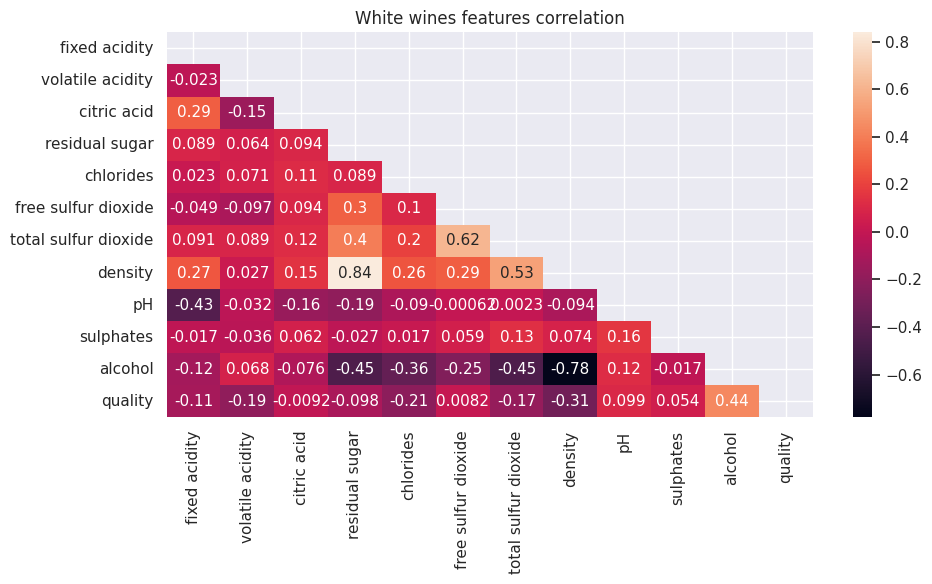

In [25]:
# Строим матрицу корреляции для белого вина

plt.figure(figsize=(10, 6))

corr_matrix = whitewine.corr()
mask = np.triu(corr_matrix)
sns.heatmap(corr_matrix, mask=mask, annot=True, annot_kws={"fontsize":11})

plt.ylabel('')
plt.xlabel('')
plt.title('White wines features correlation')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Наблюдаем явно выраженную корреляцию между сахаром и плотностью, что неудивительно.
Тем не менее наш таргет ни с чем заметно не коррелирует, поэтому оставляем все как есть.

## Формирование данных

In [26]:
# Формируем матрицу фич и вектор ответов
X = whitewine.drop(["quality"], axis=1)
y = whitewine["quality"]

# Делим данные на тренировочную и тестовую части. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Масштабируем данные
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Создание модели, подбор гипер-параметров

In [27]:
# Используем ElasticNet, которая позволяет использовать L1 и L2 регуляризацию 
elastic_net = ElasticNet()

# Задаем сетку гипер-параметров
parameters = {
    'alpha': np.linspace(0.001, 10, 100),
    "l1_ratio": np.linspace(start=0.1, stop=1, num=20)
}

# Создаем объект grid_search и обучаем его на тренировочных данных:
grid_search = GridSearchCV(elastic_net, parameters, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Получаем модель с наилучшей комбинацией параметров:
best_model = grid_search.best_estimator_

# Выводим найденную модель на экран
best_model

ElasticNet(alpha=0.001, l1_ratio=1.0)

## Применение модели, оценка результатов

In [28]:
# Рассчитываем оценку на тренировочной и тестовых частях датасета:
train_score = best_model.score(X_train, y_train)
test_score = best_model.score(X_test, y_test)

# Выводим оценки на экран
print(f"Train score: {train_score:.3f}")
print(f"Test score: {test_score:.3f}")

# Вычисляем MSE для нашей модели и датасета
mse = calc_MSE(best_model, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

# Выводим результат на экран
print(f"MSE train = {mse['train']:.3f}",
      f"MSE test = {mse['test']:.3f}",
      sep="\n")


Train score: 0.290
Test score: 0.262
MSE train = 0.558
MSE test = 0.578


Если я правильно понимаю, результаты хуже, чем мы получили при работе линейной регрессии с датасетом красного вина. 